# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости


В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Цель: 
   
   Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. 
    
    
## План работы/задачи:
    
1. Изучить данные, оценить некорректность данных.  
    
2. Предобработать данные, исключить возможные пропуски, заполнить недостающие данные.  
    
3. Добавить новые столбцы, для исследования данных  
    
4. Исследовать данные, найти закономерности и особенности 
    


### Откроем файл с данными и изучим общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t', decimal=',')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


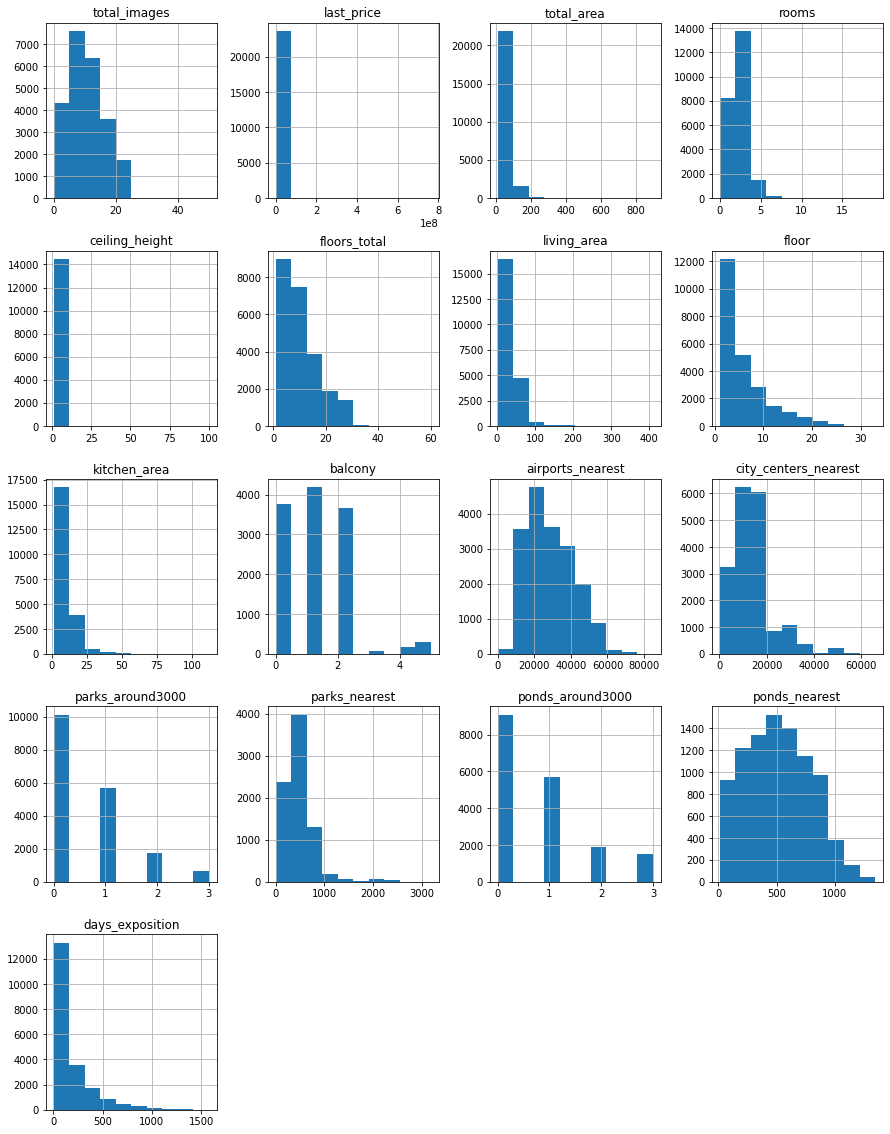

In [7]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
data.info()
data['balcony'] = pd.to_numeric(data['balcony'])
data['floors_total'] = pd.to_numeric(data['floors_total'])
data['last_price'] = pd.to_numeric(data['last_price']) 
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'])
data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000'])
data['living_area'] = pd.to_numeric(data['living_area'])
data['total_area'] = pd.to_numeric(data['total_area'])
data['kitchen_area'] = pd.to_numeric(data['kitchen_area'])
data['days_exposition'] = pd.to_numeric(data['days_exposition'])
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'])
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'])
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'])
data['city_centers_nearest'] = pd.to_numeric(data['city_centers_nearest'])
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'])

data.hist(figsize=(15, 20))
data


<div class="alert alert-info">
    
<b> 1. Всего в датасете 23699 записей </b> 
    
<b> 2. В 14 столбцах есть пропуски </b> 
    
<b> 3. Большинство столбцов имеет неправильный тип данных, при том что данные в них несут числовое значение </b> 
    
<b> 4. Так как тип данных неправильный, не получается построить гистограммы для этих столбцов, тип данных изменю в следующем шаге  
    5. По первому взгляду определенно есть выбросы в некоторых столбцах, для более детального анализа буду разбирать в отдельности каждый столбец в следующем шаге не предмет выбросов и пропусков.</b> 
</div>

### Предобработка данных

In [2]:
data.duplicated().sum() #число дубликатов 0
data.isnull().sum().sort_values()

#Пропуски в

#locality_name(название населённого пункта) (49)
#floors_total(всего этажей в доме), (86)

#living_area(жилая площадь в м²),  (1903)
#kitchen_area(площадь кухни в м²),  (2278)
#days_exposition(сколько дней было размещено объявление) (3181)
#parks_around3000(число парков в радиусе 3 км), (5518)
#ponds_around3000(число водоёмов в радиусе 3 км), (5518) 
#cityCenters_nearest(расстояние до центра города м), (5519)
#airports_nearest(расстояние до ближайшего аэропорта в м), (5542)
#ceiling_height(высота потолков (м)), (9195) 
#balcony(число балконов), (11519)
#ponds_nearest(расстояние до ближайшего водоёма м), (14589) 
#parks_nearest(расстояние до ближайшего парка м), (15620)
#is_apartment(апартаменты (булев тип)), (20924)  
 
data.dropna(subset=['floors_total'], inplace=True) # так как значений немного, удаляем записи, где отсутствует этажность
data['floors_total'] = pd.to_numeric(data['floors_total'])
data['floors_total'] = data['floors_total'].astype(int) # приводим в целочисленный тип этажность

data.dropna(subset=['locality_name'], inplace=True) # так как значений немного, удаляем записи, где отсутствует локация
data['locality_name'] = data['locality_name'].str.lower() #на всякий случай приводим всё к нижнему регистру
  
data['balcony'] = data['balcony'].fillna(0)  # заполним пропуски 0, скорее всего там нет балконов
data['balcony'] = pd.to_numeric(data['balcony']) 
data['balcony'] = data['balcony'].astype(int) # переводим в тип int

data['last_price'] = pd.to_numeric(data['last_price']) 
data['last_price'] = data['last_price'].astype(int) # Приводим в целочисленный тип стоимость квартиры

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #приводим к типу даты дату публикации

data['is_apartment'].value_counts() #Всего аппартаментов - 50
data['is_apartment'] = data['is_apartment'].fillna(value=False) #Заменяем пропущенные значения на нет.Скорее всего эти обьекты не апартаменты


data['parks_around3000'] = pd.to_numeric(data['parks_around3000']) # Приводим в целочисленный тип количество парков.
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int) # Заменяем пропущенные значения на 0, скорее всего в этом радиусе парки отсутствуют

data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000']) # Приводим в целочисленный тип количество прудов.
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int) #Заменяем пропущенные значения на 0, скорее всего в этом радиусе пруды отсутствуют

data.isnull().sum().sort_values()

data['living_area'] = data['living_area'].fillna(0)
data['living_area'] = pd.to_numeric(data['living_area'])
data['living_area'] = data['living_area'].astype(int) # переводим в тип int
data['living_area'].describe()
#sorted(data['living_area'])
#data['living_area'].tail(5) #проверил что нет максимального аномального значения 
#data['living_area'].hist(bins=100, range=(0, 270))
data['total_area'] = pd.to_numeric(data['total_area'])
data['total_area'] = data['total_area'].astype(int) # переводим в тип int
#data['total_area'] = sorted(data['total_area'])
#data['total_area'].tail()
#data.loc[data['total_area'] > 899] #самое больше значение общей площади, возможно это частный дом, но странно что всего одна комната

for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'] == 0), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median() #Заполним пропуски в 'living_area' медианными значениями по 'rooms'

data.loc[data['living_area'] > data['total_area'], 'living_area'] = data.loc[data['living_area'] > data['total_area'], 'total_area'] 
#заполнил пропуски там где жил плош больше общей - общей площадью 

data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['kitchen_area'] = pd.to_numeric(data['kitchen_area'])
data['kitchen_area'] = data['kitchen_area'].astype(int) # переводим в тип int
#data['kitchen_area'].hist(bins=100, range=(0, 300)) #заполним средним, так как пропусков не так много

data.isnull().sum().sort_values()

data.loc[data['ceiling_height'].isnull()].head(100)
data['ceiling_height'].isnull().sum() #почти в 2/3 обьявлений пропуски, не ясно на основе чего заменить, можно заменить медианным значением по всему но датасету, но это будет не так корректно, тогда на какие группы разделит?
 
#data.info()

#Изменил типы данных в столбцах где данные представляют численное значение
data['days_exposition'] = pd.to_numeric(data['days_exposition'])
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'])
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'])
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'])
data['city_centers_nearest'] = pd.to_numeric(data['city_centers_nearest'])
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'])
#data.info()

#data.isnull().sum().sort_values()
#data.hist(figsize=(15, 20))
sorted(data['ceiling_height'].unique()) #100 - выброс, 20-32 - опечатка, от 5 - 14 метров выбросы 

data.drop(index=data.query('ceiling_height > 5 and ceiling_height < 15').index,inplace=True)
data.update(data[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 32)]['ceiling_height']/10)
data.drop(index=data.query('ceiling_height > 36').index,inplace=True)
data.drop(index=data.query('ceiling_height < 2').index,inplace=True)
#sorted(data['ceiling_height'].unique()) 

#data['living_area'].hist(bins=100)
#sorted(data['living_area'].unique())
len(data.loc[data['living_area'] < 10])
data.drop(index=data.query('living_area < 10').index,inplace=True) #удалим кв с жил площадью меньше 10 так как их немного
len(data.loc[data['living_area'] > 300 ])
data.drop(index=data.query('living_area > 300').index,inplace=True) #удалим кв с жил площадью больше 220 так как их немного

data['last_price'].sort_values().head()
data['last_price'] = data['last_price'].astype(int)
len(data.loc[data['last_price'] < 1000000]) #цена за прадожу квартиры меньше миллиона кажется странной
data.drop(index=data.query('last_price < 1000000').index,inplace=True)
len(data.loc[data['last_price'] > 100000000]) #цена за прадожу квартиры больше 100 миллионов кажется странной
data.drop(index=data.query('last_price > 100000000').index,inplace=True)


data.query('floors_total > 40')['floors_total'].count()
data.drop(index=data.query('floors_total > 40').index,inplace=True) #удалим две квартиры в 50 и 60 этажных домах
data.query('floor > floors_total')['floor'].count() #проверил нет кв где этаж больше кол во этажей в доме

#data['kitchen_area'].hist(bins=100)
data['kitchen_area'].sort_values().head()
data.query('kitchen_area > 50')['floors_total'].count()
data.loc[data['kitchen_area'] > 50].head() #кухни с пл больше 50 кажутся аномальными
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)
data.drop(index=data.query('kitchen_area < 2').index,inplace=True) #кухня в 1 кв м не может быть

#data['days_exposition'].hist(bins=100)
data.query('days_exposition > 365*3')['days_exposition'].count()
data.drop(index=data.query('days_exposition > 365*3').index,inplace=True) #удалим обьявления старше 3 лет

data['airports_nearest'].sort_values().tail(1000)
data['airports_nearest'].max()
data.query('airports_nearest > 70000')['airports_nearest'].count()
#data['airports_nearest'].hist(bins=100)
data.drop(index=data.query('airports_nearest < 1').index,inplace=True)
data.drop(index=data.query('airports_nearest > 70000').index,inplace=True) #удали кв 0км от аэропорта и больше 7км так как их мало

data.reset_index(drop=True,inplace=True)

data['liv_area'] = (data['total_area'] - data['kitchen_area']) * 0.9
data.loc[(data['living_area']+data['kitchen_area']) > data['total_area'], 'living_area'] =\
    data.loc[(data['living_area']+data['kitchen_area']) > data['total_area'], 'liv_area']
data = data.drop('liv_area', axis=1)
data.loc[(data['living_area']+data['kitchen_area']) > data['total_area']] 

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].unique()
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
data['locality_name'].unique()

data.reset_index(drop=True,inplace=True)

len(data)

#100/(23699/22989) #3% #не вспомнил как это сделать "красивше" 


23025

число дубликатов 0

Пропуски в

1. locality_name(название населённого пункта) (49) так как значений немного, удаляем записи, где отсутствует этажность, на всякий случай приводим всё к нижнему регистру
#floors_total(всего этажей в доме), (86) так как значений немного, удаляем записи, где отсутствует этажность, приводим в целочисленный тип

2. living_area(жилая площадь в м²),  (1903) проверил что нет максимального аномального значения, пропуски заменил на мед по rooms, там где значения получились так что сумма жилой площади и площади кухни превышает общую площадь заменил по условию того что сумма жилой и площади кухни равно 0.9 общей площади. Удалим кв с жил площадью меньше 10 так как их немного, удалим кв с жил площадью больше 220 так как их немного

3. kitchen_area(площадь кухни в м²),  (2278) заполним средним, так как пропусков не так много. кухни с пл больше 50 кажутся аномальными, кухня в 1 кв м не может быть.

4. days_exposition(сколько дней было размещено объявление) (3181) удалим обьявления старше 3 лет

5. parks_around3000(число парков в радиусе 3 км), (5518) Заменяем пропущенные значения на 0, скорее всего в этом радиусе парки отсутствуют

6. ponds_around3000(число водоёмов в радиусе 3 км), (5518) Заменяем пропущенные значения на 0, скорее всего в этом радиусе парки отсутствуют

7. cityCenters_nearest(расстояние до центра города м), (5519)

8. airports_nearest(расстояние до ближайшего аэропорта в м), (5542) удали кв 0км от аэропорта и больше 7км так как их мало

9. ceiling_height(высота потолков (м)), (9195) почти в 2/3 обьявлений пропуски, не ясно на основе чего заменить, можно заменить медианным значением по всему но датасету, но это будет не так корректно, оставил так. Удалил выбросы: 100 - выброс, 20-32 - опечатка, от 5 - 14 метров выбросы.

10. balcony(число балконов), (11519) заполним пропуски 0, скорее всего там нет балконов, переводим в тип int

11. ponds_nearest(расстояние до ближайшего водоёма м), (14589) 

12. parks_nearest(расстояние до ближайшего парка м), (15620) 

13. is_apartment(апартаменты (булев тип)), (20924) Заменяем пропущенные значения на нет.Скорее всего эти обьекты не апартаменты

цена за прадожу квартиры меньше миллиона кажется странной, цена за прадожу квартиры больше 100 миллионов кажется странной

удалим две квартиры в 50 и 60 этажных домах, проверил нет кв где этаж больше кол во этажей в доме




<div class="alert alert-info">
    
<b> 1. Всего в датасете 23699 записей. После удаления незаполненных данных стало 22989, удалось остаться в рамках 10%. </b> 
    
<b> 2. Изменил тип данных в столбцах на int которые несут числовое значение, в столбце first_day_exposition на datetime </b>   
    
<b> 3. Удалил пропуски в толбцах где мало пропусков, удалил выбросы и некорректные значения в celing_height, living_area, last_price, floors_total, kitchen_area, days_exposition, airports_nearest. </b> 
    
<b> 4. Пропуски в living_area заменил на мед по rooms, там где значения получились так что сумма жилой площади и площади кухни превышает общую площадь заменил по условию того что сумма жилой и площади кухни равно 0.9 общей площади</b> 
    
<b> 5. Убрал бросающиеся в глаза дубликаты в столбце с названием </b> 
</div>

### Посчитаем и добавим в таблицу новые столбцы

In [3]:
data['cost_per_sqm'] = data['last_price'] / data['total_area'] #цена одного квадратного метра
data['cost_per_sqm'] = data['cost_per_sqm'].astype(int)
data['dayofweek'] = data['first_day_exposition'].dt.weekday #день недели публикации объявления
data['month'] = data['first_day_exposition'].dt.month #месяц публикации объявления
data['year'] = data['first_day_exposition'].dt.year #год публикации объявления

def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'  
data['floor_type'] = data.apply(floor_type, axis=1) #тип этажа квартиры

data['km_from_center'] = (data['city_centers_nearest']/1000).round() #расстояние до центра города в километрах

data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,dayofweek,month,year,floor_type,km_from_center
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40,2018-12-04,1,NaN,11,18.0,1,False,...,NaN,0,NaN,81.0,83750,1,12,2018,первый,19.0
2,10,5196000,56,2015-08-20,2,NaN,5,34.0,4,False,...,90.0,2,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000,159,2015-07-24,3,NaN,14,44.0,9,False,...,84.0,3,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0


### Проведем исследовательский анализ данных

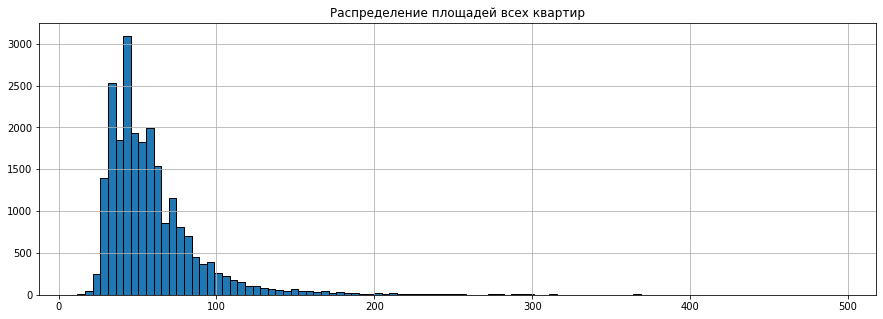

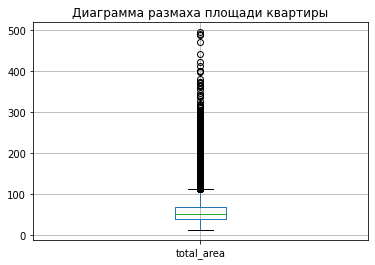

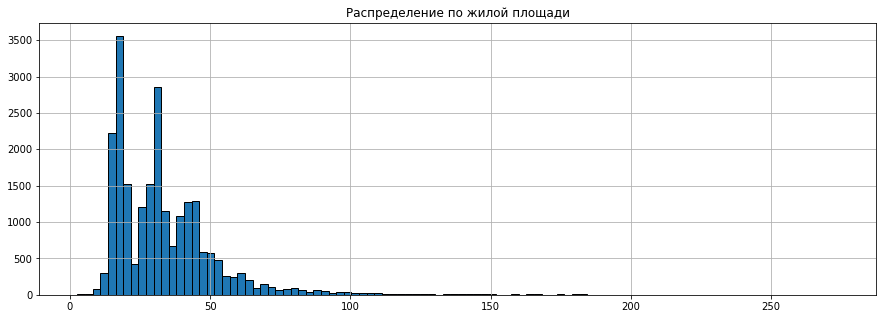

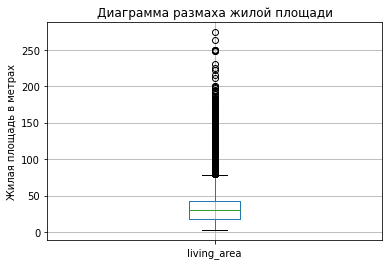

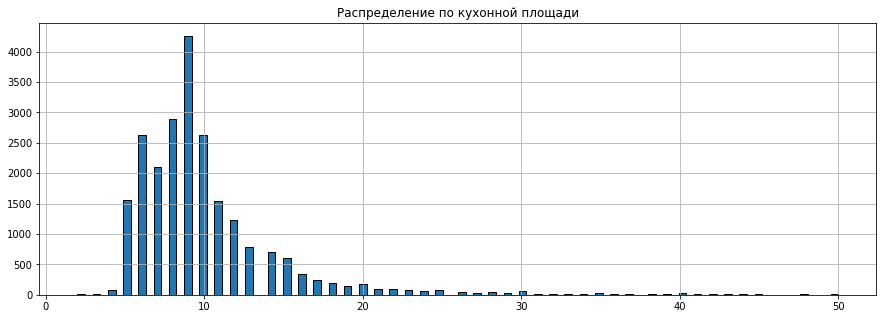

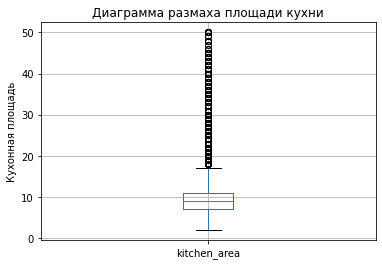

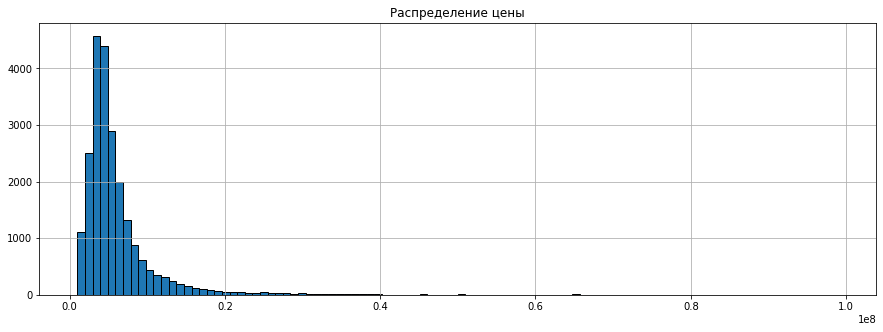

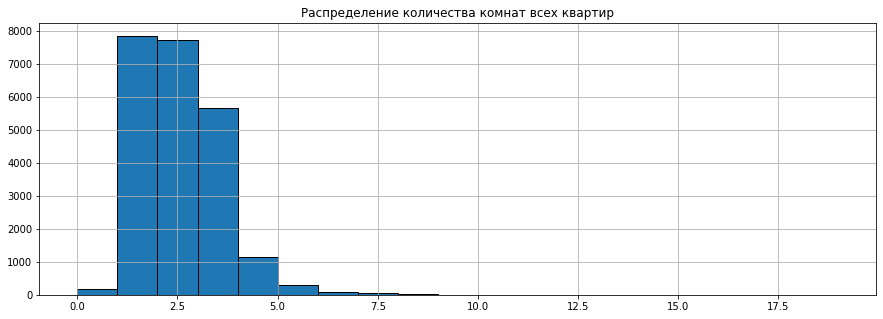

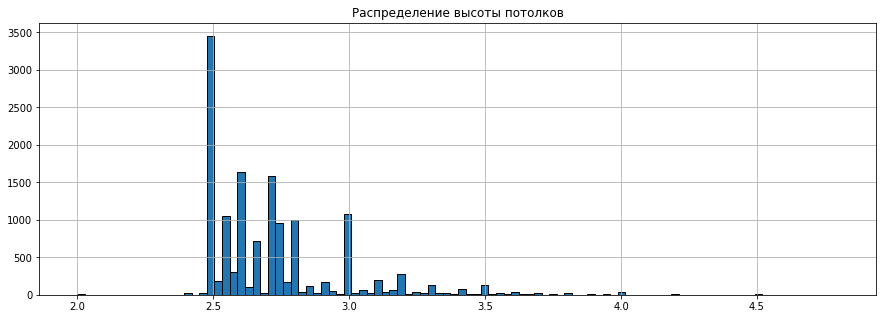

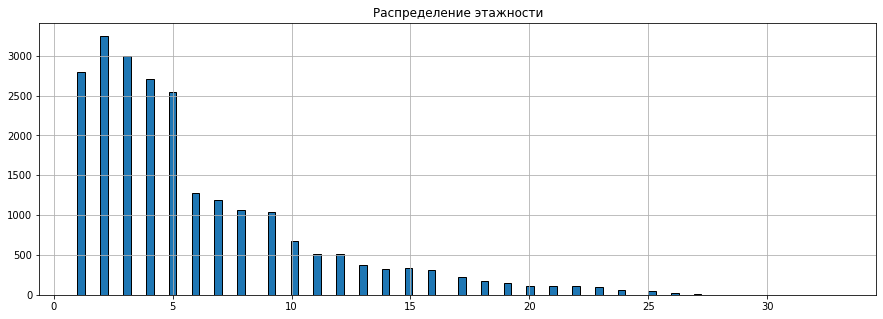

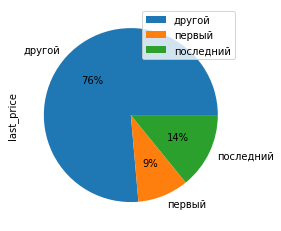

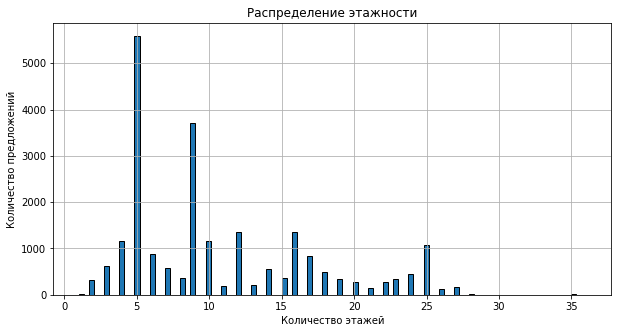

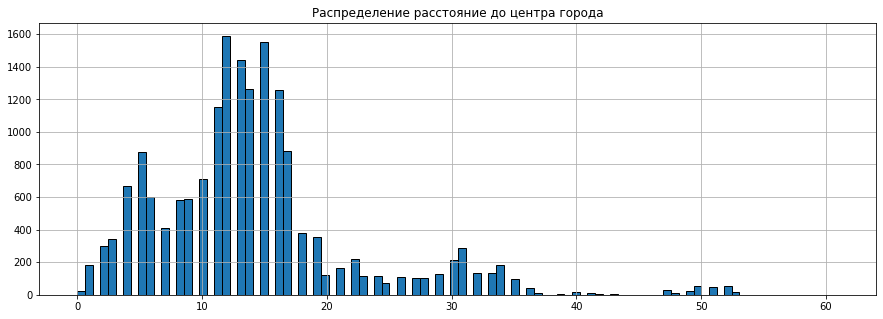

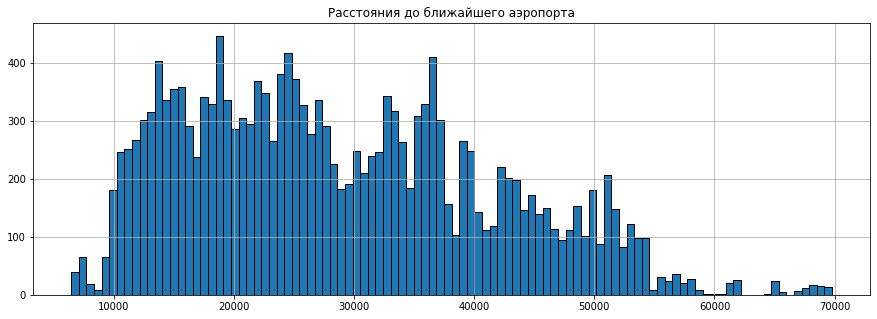

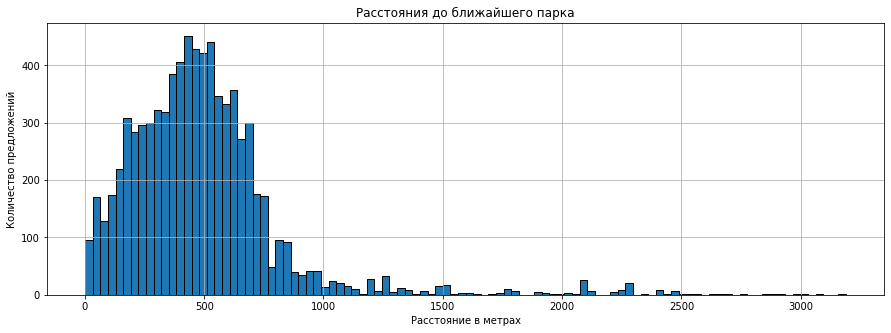

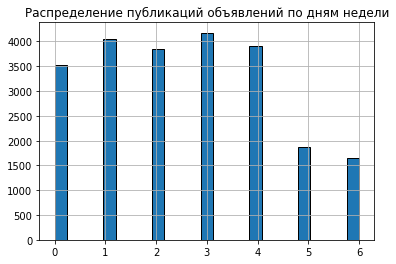

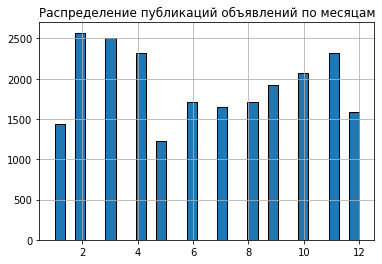

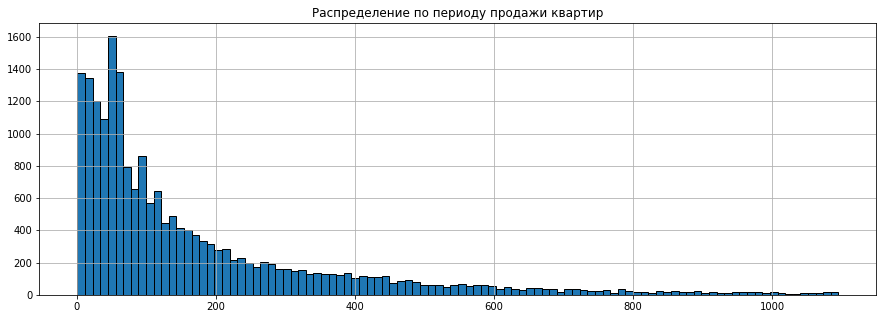

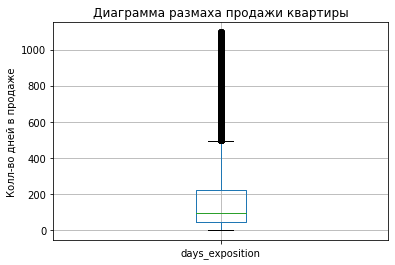

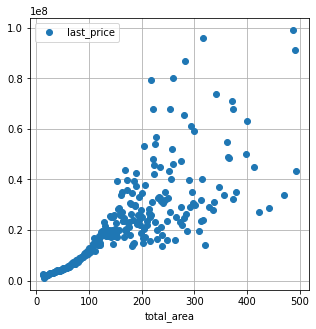

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.879591
total_area    0.879591    1.000000 



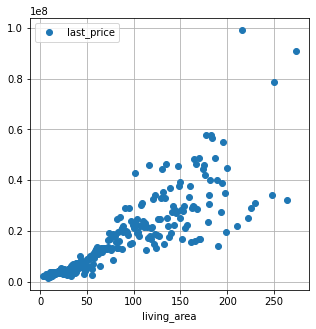

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.749591
living_area    0.749591     1.000000 



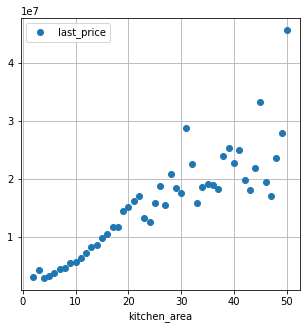

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.348119
last_price        0.348119    1.000000 



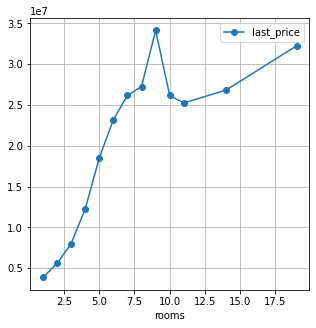

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.591586
rooms         0.591586  1.000000 



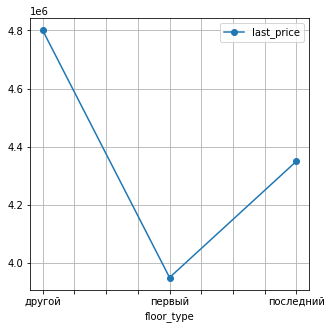

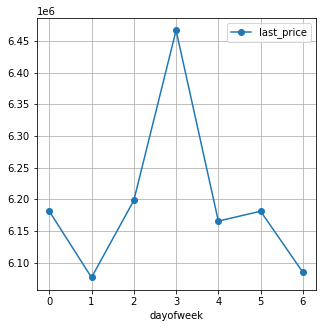

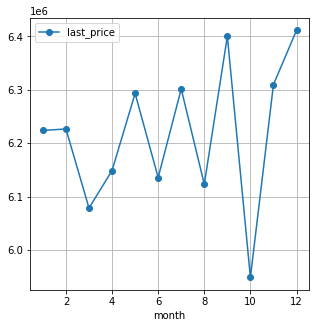

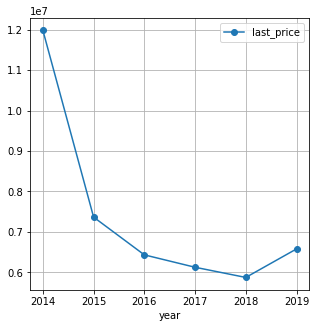

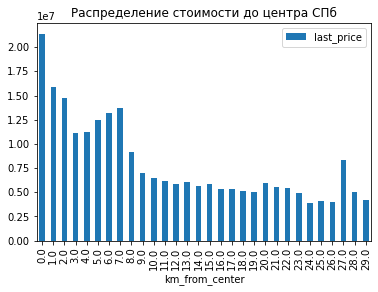

,cost_per_sqm
locality_name,
санкт-петербург,113706
пушкин,103431
деревня кудрово,92984
поселок парголово,90598
поселок мурино,86287
поселок шушары,78927
колпино,75712
гатчина,69235
всеволожск,69066


In [4]:
#общая площадь!
data['total_area'].describe()
data.hist('total_area', bins=100, ec='black', figsize=(15,5)) 
plt.title('Распределение площадей всех квартир')
plt.show()# Выведем общие данные по общей площади квартир, Построим гистограмму распределения площадей

plt.title('Диаграмма размаха площади квартиры')
data.boxplot(column=['total_area'], figsize=(10,5), grid=True) #Построим диаграмму размаха, видим что много выбросов находится в правом "усе"
#Общая площадь в нашей выборке колеблется от 12 до 494 м2, среднее значение 60, а медиана 52 м2. 
#Минимальное значение - 12 м2, скорее всего комната в коммуналке, а макс - 494 м2

#жилая площадь!
data['living_area'].describe()
data.hist('living_area', bins=100, ec='black', figsize=(15,5)) 
plt.title('Распределение по жилой площади')
plt.show() #общие данные по жилой площади квартир

plt.title('Диаграмма размаха жилой площади')
data.boxplot(column=['living_area'], figsize=(10,5), grid=True) #Построим диаграмму размаха, видим что много выбросов находится в правом "усе"
plt.ylabel('Жилая площадь в метрах')
plt.show()
#жилая площадь колеблется от 10 до 274 м2, среднее значение 34, а медиана 30 м2. 
data['living_area'].describe()

#data.hist('living_area', bins=90, ec='black', range =(25, 40), figsize=(15,5))
#plt.title('Распределение по жилой площади')
#plt.show()
#Графики почти аналогичны с общей площадью, но есть выбросы с 10-24 м и с 25 до 33 м 

#площадь кухни!
data['kitchen_area'].describe()
#Площадь кухни колеблется от 2 до 50 м, среднее значение 10, а медиана 9 м2.
data.hist('kitchen_area', bins=100, ec='black', figsize=(15,5)) 
plt.title('Распределение по кухонной площади')
plt.show() #распределение является нормальным

plt.title('Диаграмма размаха площади кухни')
data.boxplot(column=['kitchen_area'], figsize=(10,5), grid=True)
plt.ylabel('Кухонная площадь')
plt.show() #много выбросов находится в правом "усе"

#цена объекта!
(data['last_price']/100000).describe()
#цена колеблется от 1млн до 99 млн м, среднее значение 6 млн, а медиана 5 млн.
data.hist('last_price', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение цены')
plt.show() #похоже на распределение пуссона

#количество комнат!
data['rooms'].describe()
#кол-во комнат находится в диапозоне от 0 до 19, среднее значение 2, а медиана 2. 0 комнат это студии
data.hist('rooms', bins=19, ec='black', figsize=(15,5)) # гистограмма по всем объектам
plt.title('Распределение количества комнат всех квартир')
plt.show() #больше всего кв с 1-3 комнатами

#высота потолков!
data['ceiling_height'].describe()
#высота потолков находится в диапозоне от 2 до 5, среднее значение 2.7, а медиана 2.6.
data.hist('ceiling_height', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение высоты потолков')
plt.show() #есть несколько самых частых значений высоты потолка

#этаж квартиры!
data['floor'].describe()
#Этаж находится в диапозоне от 1 до 33, среднее значение 6, а медиана 4.
data.hist('floor', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение этажности')
plt.show() #чаще всего квартира находится с 1 по 5 этаж

#тип этажа квартиры!
data['floor_type'].describe() #самая многочисленная категория "другой"
data.groupby(['floor_type']).sum().plot(kind='pie', autopct='%1.0f%%', y='last_price');
#76% квартир располагаются не на первых и последних этажах. Стоимость квартиры на последних этажах выше

#общее количество этажей в доме!
data['floors_total'].describe()
data.hist('floors_total', bins=100, ec='black', figsize=(10, 5))
plt.title('Распределение этажности')
plt.xlabel('Количество этажей')
plt.ylabel('Количество предложений')
plt.show() #Всего этаже в здании от 1 до 36, 1 это скорее всего частный дом, среднее значение 11, а медиана 9.
#Больше всего зданий с 5 этажами, скорее всего из за старой постройки 

#расстояние до центра города в метрах!
data['km_from_center'].describe() #Кв находятся в диапазоне от 0 до 61 км, 0 это кв в центре, среднее 14, медиана 13
data.hist('km_from_center', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение расстояние до центра города')
plt.show() #больше всего квартир в радиусе от центра 10-16 км

#расстояние до ближайшего аэропорта!
(data['airports_nearest']/1000).round().describe() #переведм в км
#Расстояние квартир от аэропорта лежит в диапазоне от 6 до 70 км, среднее 29 км, медиана 27
data.hist('airports_nearest', bins=100, ec='black', figsize=(15, 5))
plt.title('Расстояния до ближайшего аэропорта')
plt.show() #большая часть квартир находится в от 10 до 55 км от аэропорта

#расстояние до ближайшего парка!
data['parks_nearest'].describe() #расстояние до парка от 1м до 3км, среднее 490, медиана 456
data.hist('parks_nearest', bins=100, ec='black', figsize=(15, 5))
plt.title('Расстояния до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество предложений') #большая часть квартир лежит в диапазоне от 1м до 1км

#день и месяц публикации объявления!
data['dayofweek'].describe() 
data.hist(column='dayofweek', bins=25, ec='black')
plt.title('Распределение публикаций объявлений по дням недели')
plt.show() #Чаще всего обьявления публикуют в будние дни в четверг и вторник
data['month'].describe()
data.hist(column='month', bins=30, ec='black')
plt.title('Распределение публикаций объявлений по месяцам')
plt.show() #Видимо есть определенные периоды публикации сентябрь-декабрь, февраль-август


#Как быстро продавались квартиры
data['days_exposition'].describe() #значения распределены от 1 до 1095, в среднем 172, медиана 93
data.hist('days_exposition', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение по периоду продажи квартир')
plt.show() #Можно увидеть что квартиры продаются от 1-40 дней, дальше обьявления если не продаются то остаются висеть на более долгий срок


plt.title('Диаграмма размаха продажи квартиры')
plt.ylabel('Колл-во дней в продаже')
data.boxplot(column=['days_exposition'], figsize=(10,5), grid=True)

#Какие факторы больше всего влияют на общую (полную) стоимость объекта?
# Зависимость цены от площади
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n') #0.879591

# Зависимость цены от жилой площади
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n') #0.748381 

# Зависимость цены от площади кухни
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n') #0.348119

# Зависимость цены от числа комнат
data.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n') #0.591586

# Зависимость цены от этажа
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

# Зависимость от день недели, месяц, год.
data.pivot_table(index='dayofweek', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

#Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
#city_top = (data.pivot_table(index='locality_name', aggfunc={'cost_per_sqm':'mean'})
         #.sort_values(by='cost_per_sqm', ascending=False)).head(10)
#city_top

#Средняя цена каждого километра в Санкт-петербурге, как стоимость объектов зависит от расстояния до центра города.
data[data['locality_name']=='санкт-петербург'].pivot_table(index='km_from_center', values='last_price', aggfunc='mean').plot(kind='bar')
plt.title('Распределение стоимости до центра СПб')
plt.show() #С большим отрывом лидирует недвижимость до 1км.
#Видим более низкие цены на расстоянии от 1 км. до 7 км.
#Далее цена спадает на расстоянии от 8 км. до 27 км.
#Видим пик на 27км, возможно это недвижимость в элитном районе.


city_ten = data['locality_name'].value_counts().head(10)
city_ten
city_top = data.query('locality_name in (@city_ten.index)').pivot_table(values='cost_per_sqm', index='locality_name', aggfunc='mean')
city_top = city_top.astype(int)
city_top.sort_values('cost_per_sqm', ascending=False)



<div class="alert alert-info">
    
<b> 1. Общая площадь: Построили диаграмму размаха, видим что много выбросов находится от правого "уса". Общая площадь в нашей выборке колеблется от 12 до 494 м2, среднее значение 60, а медиана 52 м2. Минимальное значение - 12 м2, скорее всего комната в коммуналке, а макс - 494 м2. </b> 
    
<b> 2. Жилая площадь: Построили диаграмму размаха, видим что много выбросов находится от правого "уса". Жилая площадь колеблется от 10 до 274 м2, среднее значение 34, а медиана 30 м2. Графики почти аналогичны с общей площадью, но есть выбросы с 10-24 м и с 25 до 33 м </b>   
    
<b> 3. Площадь кухни колеблется от 2 до 50 м, среднее значение 10, а медиана 9 м2. Распределение является нормальным </b> 
    
<b> 4. Цена объекта: Цена колеблется от 1млн до 99 млн м, среднее значение 6 млн, а медиана 5 млн.</b> 
    
<b> 5. кол-во комнат находится в диапозоне от 0 до 19, среднее значение 2, а медиана 2. 0 комнат это студии. Больше всего кв с 1-3 комнатами </b> 
    
<b> 6. высота потолков находится в диапозоне от 2 до 5, среднее значение 2.7, а медиана 2.6. Есть несколько самых частых значений высоты потолка </b> 
    
<b> 8. Тип этажа квартиры: 76% квартир располагаются не на первых и последних этажах. Стоимость квартиры на последних этажах выше </b> 
    
<b> 9. общее количество этажей в доме: Всего этаже в здании от 1 до 36, 1 это скорее всего частный дом, среднее значение 11, а медиана Больше всего зданий с 5 этажами, скорее всего из за старой постройки  </b>
    
<b> 10. Расстояние до центра города: Больше всего квартир в радиусе от центра 10-16 км </b>
    
<b> 11. Расстояние до ближайшего аэропорта: Расстояние квартир от аэропорта лежит в диапазоне от 6 до 70 км, среднее 29 км, медиана 27. Большая часть квартир находится в от 10 до 55 км от аэропорта </b>
    
<b> 12. расстояние до ближайшего парка: Расстояние до парка от 1м до 3км, среднее 490, медиана 456. Большая часть квартир лежит в диапазоне от 1м до 1км </b>
    
<b> 13. Чаще всего обьявления публикуют в будние дни в четверг и вторник. Видимо есть определенные периоды публикации сентябрь-декабрь, февраль-август </b>
    
<b> 14. Судя по диаграмме размаха видим что продажи дольше 450 дней можно считать аномально долгими, хотя и 450 дней это довольно долго, год и три месяца. По 3ему квартилю мы видим что 75% всех продаж происходит до 230 дней, поэтому долгими можно считать продажи 230 дней и дольше. Быстрыми можно считать продажи в первом квартиле (25%) это 45 дней и меньше.</b>
    
<b> 15. Из изученных факторов больше всего вляет на общую (полную) стоимость объекта общая площадь обьекта. </b>
    
<b> 16. В топ 10 городов по стоимости квадратного метра: 
C самой высокой средней стоимостью кв м(санкт-петербург, пушкин, деревня кудрово, поселок парголово, поселок мурино)
C самой низкой средней стоимостью кв м(поселок шушары, колпино, гатчина, всеволожск, выборг)	 </b>
</div>

### Общий вывод

1. Определил и заполнил пропущенные значения там, где это возможно, рассмотрел уникальные значения и убрал дубликаты.
2. Добавьте новые столбцы: цена одного квадратного метра; день недели публикации объявления; месяц публикации объявления; год публикации объявления; тип этажа квартиры; расстояние до центра города в километрах.
3. Продажи дольше 450 дней можно считать аномально долгими. Долгими можно считать 75% продаж 230 дней и дольше. Быстрыми можно считать 25% продаж это 45 дней и меньше. 
4. Из изученных факторов больше всего вляет на общую (полную) стоимость объекта общая площадь обьекта
5. В топ 10 городов по стоимости квадратного метра: 
C самой высокой средней стоимостью кв м(санкт-петербург, пушкин, деревня кудрово, поселок парголово, поселок мурино)
C самой низкой средней стоимостью кв м(поселок шушары, колпино, гатчина, всеволожск, выборг)
6. Средняя цена каждого километра в Санкт-петербурге до центра города распределяется как - с большим отрывом лидирует недвижимость до 1км. Видим более низкие цены на расстоянии от 1 км. до 7 км. Далее цена спадает на расстоянии от 8 км. до 27 км. Видим пик на 27км, возможно это недвижимость в элитном районе.
